# Section 1

In [1]:
import warnings
warnings.filterwarnings("ignore")


## Loading Data

In [2]:
import sklearn.datasets

# Loading the dataset
iris = sklearn.datasets.load_iris()

In [3]:
# Extracting features and labels and ensuring that labels are one-hot encoded

X = iris.data
y = iris.target

print("Shape of data: ",X.shape)
print("Shape of labels: ",y.shape)

# Performing one-hot encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray() 
#np.newaxis is used to increase the dimension of the existing array by one more dimension, when used once. Thus, 1D array will become 2D array.
#toarray() is used to convert the sparse matrix to dense matrix
#fit_transform() is used to fit the data and then transform it

print("Shape of labels after one-hot encoding: ",y.shape)
print("Count of each class: ",y.sum(axis = 0))

Shape of data:  (150, 4)
Shape of labels:  (150,)
Shape of labels after one-hot encoding:  (150, 3)
Count of each class:  [50. 50. 50.]


In [4]:
# Train-test split (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalizing the data to [0,1] using standard scaling
from sklearn.preprocessing import MinMaxScaler

print("First 5 rows of training data before scaling: \n",X_train[:5])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MinMaxScaler formula: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#                       X_scaled = X_std * (max - min) + min

print("First 5 rows of training data after scaling: \n",X_train[:5])

First 5 rows of training data before scaling: 
 [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
First 5 rows of training data after scaling: 
 [[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]]


## Model training and evaluation

Model:
- Input layer: 4 neurons (for 4 features).
- Hidden layer: 16 neurons, ReLU activation.
- Output layer: 3 neurons (for each class), softmax activation.

Hyperparameters:
- Loss function: Categorical cross-entropy.
- Optimizer: Adam.
- Learning rate: 0.001.
- Batch size: 32.
- Epochs: 50.


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Clear any existing model in memory
keras.backend.clear_session()

# Defining the MLP model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy())

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Training the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)
print("Finished training")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.7542 - val_loss: 0.7508
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7586 - val_loss: 0.7450
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7442 - val_loss: 0.7396
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7334 - val_loss: 0.7344
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7335 - val_loss: 0.7294
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7342 - val_loss: 0.7247
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7218 - val_loss: 0.7202
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7145 - val_loss: 0.7159
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7150 - val_loss: 0.7116
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7061 - val_loss: 0.7075
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7069 - val_loss: 0.7035
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7019 - val_loss: 0.6995
Epoch

In [8]:
# Evaluating the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("First 5 predictions: \n",y_pred[:5])
print("First 5 actual: \n",y_test[:5])

# Converting the one-hot encoded vectors to a single class
y_pred = np.argmax(y_pred, axis=1)
y_test_n = np.argmax(y_test, axis=1)

accuracy=accuracy_score(y_test_n, y_pred)
precision=precision_score(y_test_n, y_pred, average='weighted')  # average='weighted' is used to calculate the precision for each class and then average it
recall=recall_score(y_test_n, y_pred, average='weighted')
f1=f1_score(y_test_n, y_pred, average='weighted')

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
First 5 predictions: 
 [[0.21417738 0.40731522 0.37850747]
 [0.43608433 0.2787526  0.28516307]
 [0.1419981  0.42502242 0.4329795 ]
 [0.2012469  0.3969781  0.401775  ]
 [0.21066384 0.40660852 0.38272762]]
First 5 actual: 
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
Accuracy:  0.8
Precision:  0.8177777777777777
Recall:  0.8
F1 Score:  0.7868131868131869


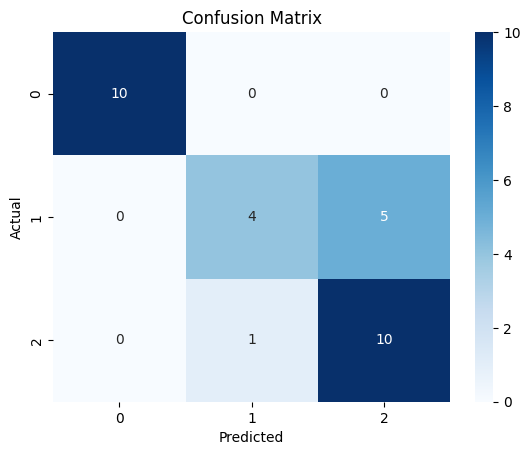

In [9]:
# Heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_n, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

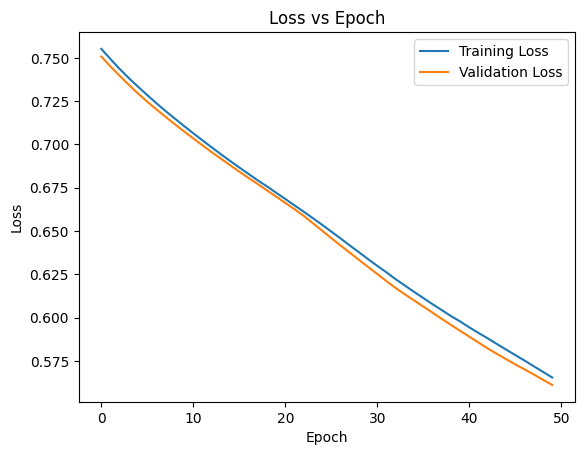

In [10]:
# Plotting the training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.savefig('loss_vs_epoch.png')
plt.show()

## Logging with Weights and Biases

**Logging the following details:**
- Model architecture: Number of layers, neurons, activation functions.
- Hyperparameters: Learning rate, batch size, number of epochs.
- Training and validation loss per epoch.
- Final evaluation metrics.
- Confusion matrix and loss curve visualizations.

In [11]:
# Logging using weights and biases
import wandb

# Take key from API.txt
with open('API.txt', 'r') as file:
    api_key = file.read()
wandb.login(key=api_key)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Praanshu IIT\_netrc
wandb: Currently logged in as: praanshu (praanshu-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [12]:
# Logging the model to weights and biases

# Initialize Weights & Biases
wandb.init(project="Asgn6")

# Log model architecture details
model_config = {
    "num_layers": len(model.layers),
    "layers": [layer.__class__.__name__ for layer in model.layers],
    "neurons": [layer.units if hasattr(layer, 'units') else None for layer in model.layers], 
    "activations": [layer.activation.__name__ for layer in model.layers if hasattr(layer, 'activation')],
}
wandb.config.update(model_config)

# Log hyperparameters
hyperparams = {
    "learning_rate": model.optimizer.learning_rate.numpy(),
    "batch_size": batch_size,
    "epochs": epochs,
}
wandb.config.update(hyperparams)

# Log training and validation loss per epoch
history_data = {"epoch": list(range(1, len(history.history['loss']) + 1)),
                "train_loss": history.history["loss"],
                "val_loss": history.history["val_loss"]}
for epoch, train_loss, val_loss in zip(*history_data.values()):
    wandb.log({"epoch": epoch, "train_loss": train_loss, "val_loss": val_loss})

# Final evaluation metrics
wandb.log({
    "accuracy": float(accuracy),
    "precision": float(precision),
    "recall": float(recall),
    "f1_score": float(f1)
}) 


# Log pre-generated confusion matrix
wandb.log({"confusion_matrix": wandb.Image("confusion_matrix.png")})

# Log pre-generated loss curve
wandb.log({"loss_curve": wandb.Image("loss_vs_epoch.png")})


# Finish logging
wandb.finish()

accuracy,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1_score,▁
precision,▁
recall,▁
train_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁
val_loss,███▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
accuracy,0.8
epoch,50
f1_score,0.78681
precision,0.81778


# Task 2


Use the model trained in the previous section.
Train the model on the batch size of [2 & 4], learning rate [1e-3 and 1e-5], and epochs [1, 3, and 5].
Train the model and measure the accuracy and F1 over the test set. Plot the confusion matrix over the test-set predictions.
Plot using the truth labels and predicted labels in matplotlib. 
Show the inputs, prediction, and truth values for five samples from the test set.



In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Define parameters for grid search
param = {
    'batch_size': [2, 4],
    'learning_rate': [0.001, 1e-5],
    'epochs': [1, 3, 5]
}

results = []
for batch_size in param['batch_size']:
    for learning_rate in param['learning_rate']:
        for epochs in param['epochs']:
            print(f"\nTraining model with batch_size: {batch_size}, learning_rate: {learning_rate}, epochs: {epochs}")
            keras.backend.clear_session()

            model = Sequential()
            model.add(Dense(16, input_dim=4, activation='relu'))
            model.add(Dense(3, activation='softmax'))

            model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.BinaryCrossentropy())


            # Training the model
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                              verbose=1, validation_split=0.1)

            # Evaluating the model
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_test_classes = np.argmax(y_test, axis=1)

            # Calculate metrics
            accuracy = accuracy_score(y_test_classes, y_pred_classes)
            f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
            
            # Store results
            results.append({
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'epochs': epochs,
                'accuracy': accuracy,
                'f1': f1
            })
            # store y_pred_classes and y_test_classes for confusion matrix
            results[-1]['y_pred_classes'] = y_pred_classes
            results[-1]['y_test_classes'] = y_test_classes
            

            # Show 5 sample predictions
            print("\nSample predictions:")
            print("Input Features | True Label | Predicted Label")
            print("-" * 50)
            for i in range(5):
                true_label = y_test_classes[i]
                pred_label = y_pred_classes[i]
                features = X_test[i]
                print(f"{features} | {true_label} | {pred_label}")






Training model with batch_size: 2, learning_rate: 0.001, epochs: 1
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7012 - val_loss: 0.6769
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 1
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2

Training model with batch_size: 2, learning_rate: 0.001, epochs: 3
Epoch 1/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7054 - val_loss: 0.6643
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6661 - val_loss: 0.6359
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6404 - val_loss: 0.6097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Sample predictions:
Input Features | True Label | Predicted Label
-----------

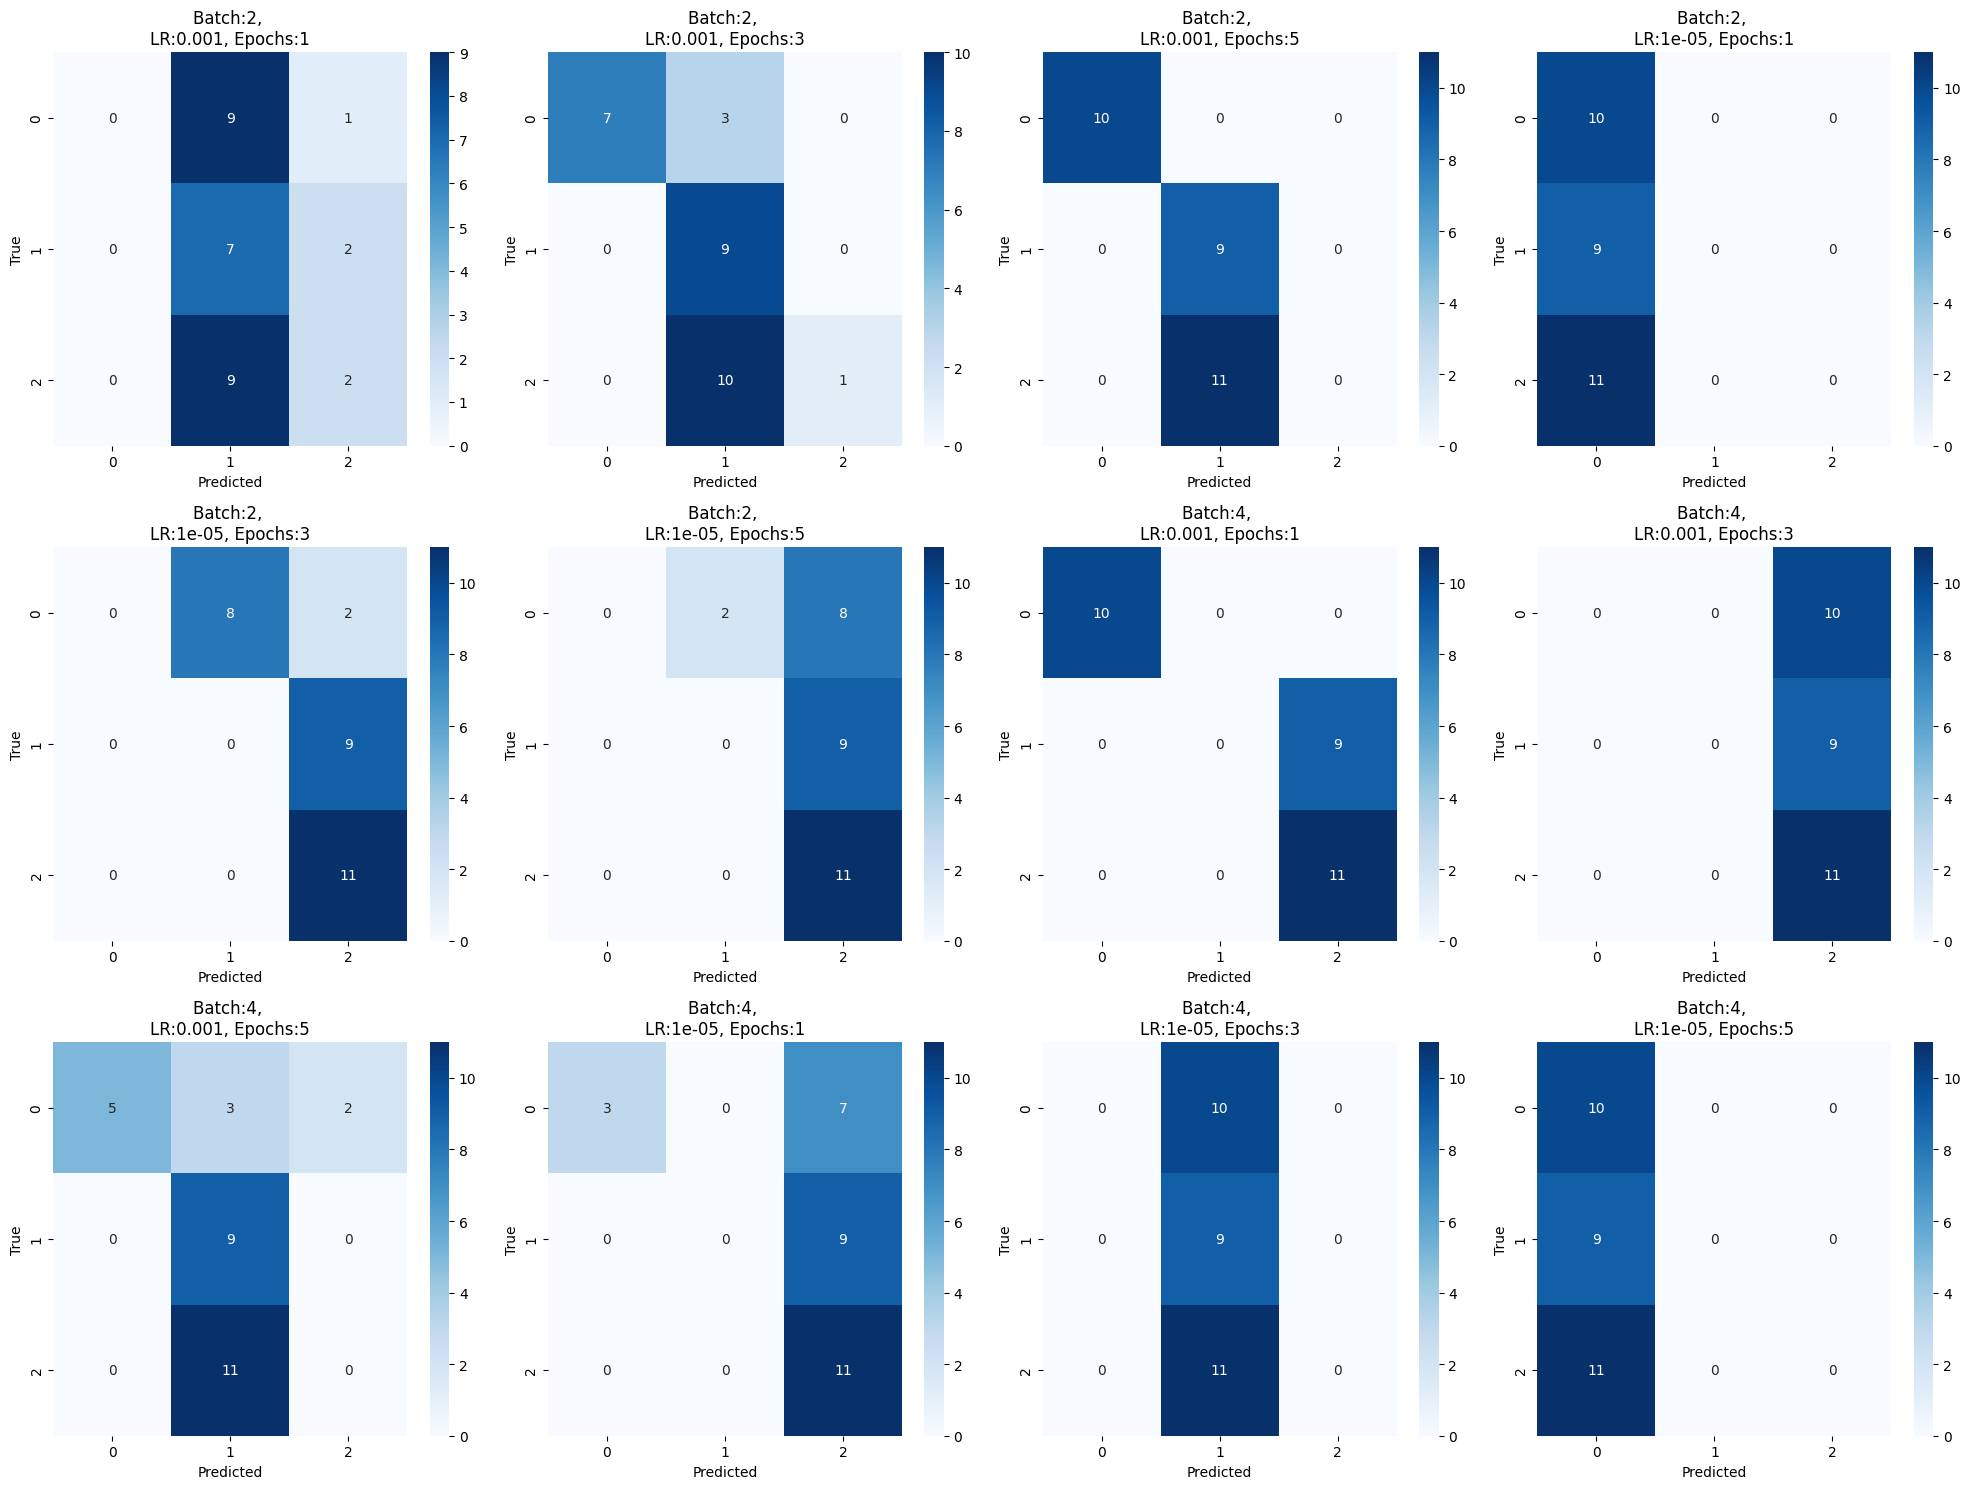

In [14]:
# Plotting confusion matrix for all configurations
plt.figure(figsize=(20, 15))
for i, result in enumerate(results):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns to accommodate all 12 configurations
    cm = confusion_matrix(result['y_test_classes'], result['y_pred_classes'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Batch:{result["batch_size"]}, \nLR:{result["learning_rate"]}, Epochs:{result["epochs"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()

plt.show()


In [15]:
best_result = max(results, key=lambda x: x['accuracy'])
print("\nBest configuration:")
print(f"Batch size: {best_result['batch_size']}")
print(f"Learning rate: {best_result['learning_rate']}")
print(f"Epochs: {best_result['epochs']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"F1 Score: {best_result['f1']:.4f}")



Best configuration:
Batch size: 4
Learning rate: 0.001
Epochs: 1
Accuracy: 0.7000
F1 Score: 0.5935


In [16]:
    # Define a simpler search space to start with
param_grid = {
     'num_epochs': 50,         # Fixed number of epochs
            'learning_rate': 0.001,   # Fixed learning rate
            'activation': 'relu',     # Fixed activation
            'dropout_prob': 0.1,      # Fixed dropout
            'weight_decay': 0.001,    # L2 regularization
            'optimizer': 'adam'       # Fixed optimizer
        }
#printing the parameters
print(param_grid)


{'num_epochs': 50, 'learning_rate': 0.001, 'activation': 'relu', 'dropout_prob': 0.1, 'weight_decay': 0.001, 'optimizer': 'adam'}
